<a href="https://colab.research.google.com/github/Debasmita-Pal/Code_With_Python/blob/main/20MAI0018_ASS4_QS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#REG NO: 20MAI0018

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [52]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='/content/drive/My Drive/CXR_Data/train',target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='/content/drive/My Drive/CXR_Data/test', target_size=(224,224))

Found 1920 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [53]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [54]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [55]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 56, 56, 256)      

In [57]:
hist = model.fit_generator(
  traindata,
  validation_data=testdata,
  epochs=10,
  steps_per_epoch=10,
  validation_steps=2
  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 31s 3s/step - loss: 0.3789 - accuracy: 0.7163 - val_loss: 0.2871 - val_accuracy: 0.9219
Epoch 2/10
10/10 [==============================] - 27s 3s/step - loss: 0.1805 - accuracy: 0.9589 - val_loss: 0.3245 - val_accuracy: 0.9062
Epoch 3/10
10/10 [==============================] - 27s 3s/step - loss: 0.2349 - accuracy: 0.9369 - val_loss: 0.2633 - val_accuracy: 0.9219
Epoch 4/10
10/10 [==============================] - 24s 2s/step - loss: 0.1646 - accuracy: 0.9555 - val_loss: 0.3249 - val_accuracy: 0.9062
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.1917 - accuracy: 0.9465 - val_loss: 0.4825 - val_accuracy: 0.8594
Epoch 6/10
10/10 [==============================] - 19s 2s/step - loss: 0.0839 - accuracy: 0.9805 - val_loss: 0.2567 - val_accuracy: 0.9062
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.1521 - accuracy: 0.9506 - val_loss: 0.2798 - val_accuracy: 0.8906
Epoch 8/10
10/10 [==

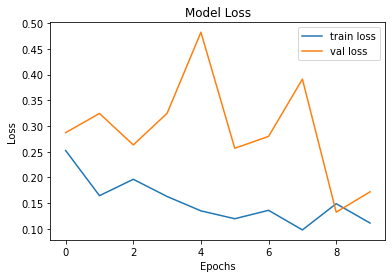

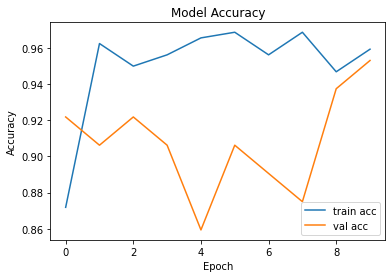

<Figure size 432x288 with 0 Axes>

In [60]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [61]:
test_acc = model.evaluate_generator(testdata)
print("\n%s: %.2f%%" % (model.metrics_names[1], test_acc[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



accuracy: 94.44%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


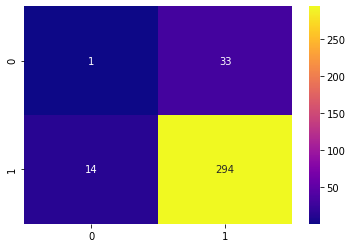

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred = model.predict_generator(testdata) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = testdata.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1])
sns.heatmap(
    cm, 
    cmap="plasma",
    annot = True, 
    fmt = "d"
)
plt.show()